(information_consumption_smoothing-v3)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Information and Consumption Smoothing

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture employs the following libraries:

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/share/miniconda3/envs/qe-lectures/lib/python3.8/site-packages (0.4.8)


## Overview

This lecture studies two consumers who have exactly the same
nonfinancial income process and who both conform to the linear-quadratic
permanent income of consumption smoothing model described in the
[quantecon lecture](https://python-intro.quantecon.org/perm_income_cons.html).

The two consumers  have different information about
future nonfinancial incomes.

One consumer each period receives **news** in the form of a shock that simultaneously
affects both **today’s** nonfinancial income and  the
present value of **future** nonfinancial incomes in a particular way.

The other, less well informed, consumer each period receives a shock
that equals  the part of today’s nonfinancial income that could not be
forecast from all  past values of nonfinancial income.

Even though they receive exactly the same nonfinancial incomes each
period, our two consumers behave differently because they have different information about
their future nonfinancial incomes.

The second consumer receives less information about future nonfinancial
incomes in a sense that we shall make precise below.

This difference in their information sets manifests itself in their responding differently to what they regard as time $t$ information
shocks.

Thus, while they receive exactly the same histories of
nonfinancial income, our two consumers receive different **shocks** or **news** about
their **future** nonfinancial incomes.

We compare behaviors of our two consumers as a way to learn about

- operating characteristics of the linear-quadratic permanent income
  model
- how the Kalman filter introduced in [this lecture](https://python-intro.quantecon.org/kalman.html)
  and/or the theory of optimal
  forecasting introduced in [this lecture](https://python-advanced.quantecon.org/classical_filtering.html)
  embody lessons
  that can be applied to the **news** and **noise** literature
- various ways of representing and computing optimal decision rules in
  the linear-quadratic permanent income model
- a **Ricardian equivalence** outcome describing effects on optimal
  consumption of a tax cut at time $t$ accompanied by a foreseen
  permanent increases in taxes that is just sufficient to cover the interest
  payments used to service the risk-free government bonds that are issued to finance
  the tax cut
- a simple application of alternative ways to factor a covariance
  generating function along lines described in [this lecture](https://python-advanced.quantecon.org/classical_filtering.html)

This lecture can be regarded as an introduction to some of the **invertibility** issues that take center stage in
the analysis of **fiscal foresight** by Eric Leeper, Todd Walker, and Susan Yang {cite}`Leeper_Walker_Yang`.

## Two Representations of the **Same** Nonfinancial Income Process

Where $\beta \in (0,1)$, we study consequences of endowing a
consumer with one of the two alternative representations for the change
in the consumer’s nonfinancial income $y_{t+1} - y_t$.

The first representation, which we shall refer to as the **original representation**, is

```{math}
:label: eqn_1

y_{t+1} - y_t  =  \epsilon_{t+1} - \beta^{-1}  \epsilon_t  \quad
```

where $\{\epsilon_t\}$ is an i.i.d. normally distributed scalar
process with means of zero and contemporaneous variances
$\sigma_\epsilon^2$.

This representation of the process is used by a consumer who at time
$t$ knows both $y_t$ and the original shock
$\epsilon_t$ and can use both of them to forecast future
$y_{t+j}$’s.

Furthermore, as we'll see below, representation {eq}`eqn_1` has the peculiar property that a positive shock
$\epsilon_{t+1}$ leaves the discounted present value of the consumer's financial income at time $t+1$
unaltered.

The second representation of the **same** $\{y_t\}$ process is

```{math}
:label: eqn_2

y_{t+1} - y_t =  a_{t+1} - \beta  a_t \quad
```

where $\{a_t\}$ is another i.i.d. normally distributed scalar
process, with means of zero and now variances $\sigma_a^2$.

The two i.i.d. shock variances are related by

$$
\sigma_a^2 = \beta^{-2} \sigma_\epsilon^2 >  \sigma_\epsilon^2
$$

so that the variance of the innovation exceeds the variance of the
original shock by a multiplicative factor $\beta^{-2}$.

The second representation is the **innovations representation** from
Kalman filtering theory.

To see how this works, note that equating representations {eq}`eqn_1`
and {eq}`eqn_2` for $y_{t+1} - y_t$ implies
$\epsilon_{t+1} - \beta^{-1} \epsilon_t = a_{t+1} - \beta a_t$,
which in turn implies

$$
a_{t+1} = \beta a_t + \epsilon_{t+1} - \beta^{-1} \epsilon_t .
$$

Solving this difference equation backwards for $a_{t+1}$ gives,
after a few lines of algebra,

```{math}
:label: eqn_3

a_{t+1} = \epsilon_{t+1} + (\beta - \beta^{-1}) \sum_{j=0}^\infty \beta^j \epsilon_{t-j} \quad
```

which we can also write as

$$
a_{t+1} = \sum_{j=0}^\infty h_j \epsilon_{t+1 -j} \equiv h(L) \epsilon_{t+1}
$$

where $L$ is the one-period lag operator, $h(L) = \sum_{j=0}^\infty h_j L^j$, $I$ is the
identity operator, and

$$
h(L) = \frac{ I -\beta^{-1} L}{ I - \beta L}
$$

Let $g_j \equiv E z_t z_{t-j}$ be the $j$th autocovariance
of the $\{y_t - y_{t-1}\}$ process.

Using calculations in the [quantecon lecture](https://python-advanced.quantecon.org/classical_filtering.html), where
$z \in C$ is a complex variable, the covariance generating
function $g (z) =
\sum_{j=-\infty}^\infty g_j z^j$
of the $\{(y_t - y_{t-1})\}$ process equals

$$
g(z) = \sigma_\epsilon^2  h(z) h(z^{-1}) = \beta^{-2} \sigma_\epsilon^2 > \sigma_\epsilon^2 ,
$$

which confirms that $\{a_t\}$ is a **serially uncorrelated**
process with variance

$$
\sigma_a^2 = \beta^{-1} \sigma_\epsilon^2 .
$$

To verify these claims, just notice that
$g(z) = \beta^{-2} \sigma_\epsilon^2$ implies that the coefficient
$g_0 = \beta^{-2} \sigma_\epsilon^2$ and that $g_j = 0$ for
$j \neq 0$.

Alternatively, if you are uncomfortable with covariance generating
functions, note that we can directly calculate $\sigma_a^2$ from
formula {eq}`eqn_3` according to

$$
\sigma_a^2 = \sigma_\epsilon^2 + [ 1 + (\beta - \beta^{-1})^2 \sum_{j=0}^\infty \beta^{2j} ] = \beta^{-1} \sigma_\epsilon^2 .
$$

### Application of Kalman filter

We can also obtain representation {eq}`eqn_2` from representation {eq}`eqn_1` by using
the **Kalman filter**.

Thus, from equations associated with the **Kalman filter**, it can be
verified that the steady-state Kalman gain $K = \beta^2$ and the
steady state conditional covariance
$\Sigma = E [(\epsilon_t - \hat \epsilon_t)^2 | y_{t-1}, y_{t-2}, \ldots ] = (1 - \beta^2) \sigma_\epsilon^2$.

In a little more detail, let $z_t = y_t - y_{t-1}$ and form the
state-space representation

$$
\begin{aligned} \epsilon_{t+1} & = 0 \epsilon_t +  \epsilon_{t+1} \cr
           z_{t+1} & = - \beta^{-1} \epsilon_t + \epsilon_{t+1} \end{aligned}
$$

and assume that $\sigma_\epsilon = 1$ for convenience

Compute the steady-state Kalman filter for this system and let $K$
be the steady-state gain and $a_{t+1}$ the one-step ahead
innovation.

The innovations representation is

$$
\begin{aligned} \hat \epsilon_{t+1} & = 0 \hat \epsilon_t + K a_{t+1} \cr
           z_{t+1} & = - \beta a_t + a_{t+1} \end{aligned}
$$

By applying formulas for the steady-state Kalman filter, by hand we
computed that
$K = \beta^2, \sigma_a^2 = \beta^{-2} \sigma_\epsilon^2 = \beta^{-2},$
and $\Sigma = (1-\beta^2) \sigma_\epsilon^2$.

We can also obtain these formulas via the classical filtering theory
described in [this lecture](https://python-advanced.quantecon.org/classical_filtering.html).

### News Shocks and Less Informative Shocks

Representation {eq}`eqn_1` is cast in terms of a **news shock**
$\epsilon_{t+1}$ that represents a shock to nonfinancial income
coming from taxes, transfers, and other random sources of income changes
known to a well-informed person having all sorts of information about
the income process.

Representation {eq}`eqn_2` for the **same** income process is driven by shocks
$a_t$ that contain less information than the news shock
$\epsilon_t$.

Representation {eq}`eqn_2` is called the **innovations** representation for the
$\{y_t - y_{t-1}\}$ process.

It is cast in terms of what time series statisticians call the
**innovation** or **fundamental** shock that emerges from applying the
theory of optimally predicting nonfinancial income based solely on the
information contained solely in **past** levels of growth in
nonfinancial income.

**Fundamental for the** ${y_t}$ **process** means that the shock
$a_t$ can be expressed as a square-summable linear combination of
$y_t, y_{t-1}, \ldots$.

The shock $\epsilon_t$ is **not fundamental** and has more
information about the future of the $\{y_t - y_{t-1}\}$ process
than is contained in $a_t$.

Representation {eq}`eqn_3` reveals the important fact that the **original
shock** $\epsilon_t$ contains more information about future
$y$’s than is contained in the semi-infinite history
$y^t = [y_t, y_{t-1}, \ldots ]$ of current and past $y$’s.

Staring at representation {eq}`eqn_3` for $a_{t+1}$ shows that it consists
both of **new news** $\epsilon_{t+1}$ as well as a long moving
average $(\beta - \beta^{-1})\sum_{j=0}^\infty \beta^j\epsilon_{t-j}$ of **old news**.

The **better informed** representation {eq}`eqn_1` asserts that a shock
$\epsilon_{t}$ results in an impulse response to nonfinancial
income of $\epsilon_t$ times the sequence

$$
1, 1- \beta^{-1}, 1- \beta^{-1}, \ldots
$$

so that a shock that **increases** nonfinancial income $y_t$ by
$\epsilon_t$ at time $t$ is followed by an **increase** in
future $y$ of $\epsilon_t$ times $1 - \beta^{-1} < 0$
in **all** subsequent periods.

Because $1 - \beta^{-1} < 0$, this means that a positive shock of
$\epsilon_t$ today raises income at time $t$ by
$\epsilon_t$ and then **decreases all** future incomes by
$(\beta^{-1} -1)\epsilon_t$.

This pattern precisely describes the following mental experiment:

- The consumer receives a government transfer of $\epsilon_t$ at
  time $t$.
- The government finances the transfer by issuing a one-period bond on
  which it pays a gross one-period risk-free interest rate equal to
  $\beta^{-1}$.
- In each future period, the government **rolls over** the one-period
  bond and so continues to borrow $\epsilon_t$ forever.
- The government imposes a lump-sum tax on the consumer in order to pay
  just the current interest on the original bond and its successors
  created by the roll-over operation.
- In all future periods $t+1, t+2, \ldots$, the government levies
  a lump-sum tax on the consumer of $\beta^{-1} -1$ that is just
  enough to pay the interest on the bond.

The **present value** of the impulse response or moving average
coefficients equals $d_\epsilon(L) = \frac{0}{1 -\beta } =0$, a fact that we’ll see again
below.

Representation {eq}`eqn_2`, i.e., the innovation representation, asserts that a
shock $a_{t}$ results in an impulse response to nonfinancial
income of $a_t$ times

$$
1, 1 -\beta, 1 - \beta, \ldots
$$

so that a shock that increases income $y_t$ by $a_t$ at time
$t$ can be expected to be followed by an **increase** in $y_{t+j}$
of $a_t$ times $1 - \beta > 0$ in all future periods $j=1, 2, \ldots$.

The present value of the impulse response or moving average coefficients
for representation {eq}`eqn_2` is
$d_a(\beta) = \frac{1 -\beta^2}{1 -\beta } = (1 + \beta)$, another
fact that will be important below.

### Representation of $\epsilon_t$ in Terms of Future $y$’s

Notice that reprentation {eq}`eqn_1`, namely, $y_{t+1} - y_t = -\beta^{-1} \epsilon_t + \epsilon_{t+1}$
implies the linear difference equation

$$
\epsilon_t = \beta \epsilon_{t+1} - \beta (y_{t+1} - y_t ).
$$

Solving forward we eventually obtain

$$
\epsilon_t = \beta ( y_t - (1-\beta) \sum_{j=0}^\infty \beta^j y_{t+j+ 1} )
$$

This equation shows that $\epsilon_t$ equals
$\beta$ times the one-step-backwards error in
optimally  **backcasting** $y_t$ based on
the **future** $y^t_+ \equiv y_{t+1}, y_{t+2}, \ldots ]$ via the optimal backcasting formula

$$
E [ y_t | y^t_+] = (1-\beta) \sum_{j=0}^\infty \beta^j y_{t+j+ 1}
$$

Thus, $\epsilon_t$ contains **exact** information about an
important linear combination of **future** nonfinancial income.

### Representation in Terms of $a_t$ Shocks

Next notice that representation {eq}`eqn_2`, namely, $y_{t+1} - y_t = -
\beta a_t + a_{t+1}$ implies the linear difference
equation

$$
a_{t+1} = \beta a_t + (y_{t+1} - y_t)
$$

Solving this equation backward establishes that the one-step-prediction
error $a_{t+1}$ is

$$
a_{t+1} = y_{t+1} - (1-\beta) \sum_{j=0}^\infty \beta^j y_{t-j}
$$

and where the information set is $y^t = [y_t, y_{t-1}, \ldots ]$,
the one step-ahead optimal prediction is

$$
E [ y_{t+1} | y^t ] = (1-\beta) \sum_{j=0}^\infty \beta^j y_{t-j}
$$

### Permanent Income Consumption-Smoothing Model

When we computed optimal consumption-saving policies for the two
representations using formulas obtained with the difference equation
approach described in the [quantecon lecture](https://python-intro.quantecon.org/perm_income_cons.html),
we obtain:

**for a consumer having the information assumed in the news
representation** {eq}`eqn_1`:

$$
\begin{aligned}
c_{t+1} - c_t & = 0 \cr
b_{t+1} - b_t &  = - \beta^{-1} \epsilon_t
\end{aligned}
$$

**for a consumer having the more limited information associated with the
innovations representation** {eq}`eqn_2`:

$$
\begin{aligned}
c_{t+1} - c_t & = (1-\beta^2) a_{t+1} \cr
b_{t+1} - b_t & = - \beta a_t
\end{aligned}
$$

These formulas agree with outcomes from the Python programs to be
reported below using state-space representations and dynamic
programming.

Evidently the two consumers behave differently though they receive
exactly the same histories of nonfinancial income.

The consumer with information associated with representation {eq}`eqn_1`
responds to each shock $\epsilon_{t+1}$ by leaving his consumption
unaltered and **saving** all of $a_{t+1}$ in anticipation of the
permanently increased taxes that he will bear to pay for the addition
$a_{t+1}$ to his time $t+1$ nonfinancial income.

The consumer with information associated with representation {eq}`eqn_2`
responds to a shock $a_{t+1}$ by increasing his consumption by
what he perceives to be the **permanent** part of the increase in
consumption and by increasing his **saving** by what he perceives to be
the temporary part.

We can regard the first consumer as someone
whose behavior sharply illustrates the behavior assumed in a classic
Ricardian equivalence experiment.

## State Space Representations

We can cast our two representations in terms of the following two state
space systems

$$
\begin{aligned}  \begin{bmatrix} y_{t+1} \cr \epsilon_{t+1} \end{bmatrix}  &=
      \begin{bmatrix} 1 & - \beta^{-1} \cr 0 & 0 \end{bmatrix} \begin{bmatrix} y_t \cr \epsilon_t \end{bmatrix}
       + \begin{bmatrix} \sigma_\epsilon \cr \sigma_\epsilon \end{bmatrix}
       v_{t+1} \cr
y_t & =  \begin{bmatrix} 1 & 0 \end{bmatrix}    \begin{bmatrix} y_t \cr \epsilon_t \end{bmatrix} \end{aligned}
$$

and

$$
\begin{aligned}  \begin{bmatrix} y_{t+1} \cr a_{t+1} \end{bmatrix}  &=
      \begin{bmatrix} 1 & - \beta \cr 0 & 0 \end{bmatrix} \begin{bmatrix} y_t \cr a_t \end{bmatrix}
       + \begin{bmatrix} \sigma_a \cr \sigma_a \end{bmatrix}
       u_{t+1} \cr
y_t & =  \begin{bmatrix} 1 & 0 \end{bmatrix}    \begin{bmatrix} y_t \cr a_t \end{bmatrix} \end{aligned}
$$

where $\{v_t\}$ and $\{u_t\}$ are both i.i.d. sequences of
univariate standardized normal random variables.

These two alternative income processes are ready to be used in the
framework presented in the section “Comparison with the Difference
Equation Approach” in the [quantecon  lecture](https://python-intro.quantecon.org/perm_income_cons.html).

All the code that we shall use below is presented in that lecture.

### Computations

We shall use Python to form **both** of the above two state-space
representations, using the following parameter values
$\sigma_\epsilon = 1, \sigma_a = \beta^{-1} \sigma_\epsilon = \beta^{-1}$
where $\beta$ is the **same** value as the discount factor in the
household’s problem in the LQ savings problem in the [lecture](https://python-intro.quantecon.org/perm_income_cons.html).

For these two representations, we use the code in the
[lecture](https://python-intro.quantecon.org/perm_income_cons.html) to

- compute optimal decision rules for $c_t, b_t$ for the two types
  of consumers associated with our two representations of nonfinancial
  income
- use the value function objects $P, d$ returned by the code to
  compute optimal values for the two representations when evaluated at
  the following initial conditions $x_0 =$

$$
\begin{bmatrix} 10 \cr 0 \end{bmatrix}
$$

for each representation.

- create instances of the
  [LinearStateSpace](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/lss.py)
  class for the two representations of the $\{y_t\}$ process and
  use them to obtain impulse response functions of $c_t$ and
  $b_t$ to the respective shocks $\epsilon_t$ and
  $a_t$ for the two representations.
- run simulations of $\{y_t, c_t, b_t\}$ of length $T$
  under both of the representations (later I’ll give some more details
  about how we’ll run some special versions of these)

We want to solve the LQ problem:

$$
\min\ \sum_{t=0}^{\infty}\beta^{t}\left(c_{t}-\gamma\right)^{2}
$$

subject to the sequence of constraints

$$
\quad c_{t}+b_{t}=\frac{1}{1+r}b_{t+1}+y_{t}, \quad t \geq 0
$$

where $y_t$ follows one of the representations defined above.

Define the control as $u_t \equiv c_t - \gamma$.

(For simplicity we can assume $\gamma=0$ below because
$\gamma$ has no effect on the impulse response functions that
interest us.)

The state transition equations under our two representations for the
nonfinancial income process $\{y_t\}$ can be written as

$$
\left[\begin{array}{c}
y_{t+1}\\
\epsilon_{t+1}\\
b_{t+1}
\end{array}\right]=\underset{\equiv A_{1}}{\underbrace{\left[\begin{array}{ccc}
1 & -\beta^{-1} & 0\\
0 & 0 & 0\\
-\left(1+r\right) & 0 & 1+r
\end{array}\right]}}\left[\begin{array}{c}
y_{t}\\
\epsilon_{t}\\
b_{t}
\end{array}\right]+\underset{\equiv B_{1}}{\underbrace{\left[\begin{array}{c}
0\\
0\\
1+r
\end{array}\right]}}\left[\begin{array}{c}
c_{t}\end{array}\right]+\underset{\equiv C_{1}}{\underbrace{\left[\begin{array}{c}
\sigma_{\epsilon}\\
\sigma_{\epsilon}\\
0
\end{array}\right]}}\nu_{t+1},
$$

and

$$
\left[\begin{array}{c}
y_{t+1}\\
a_{t+1}\\
b_{t+1}
\end{array}\right]=\underset{\equiv A_{2}}{\underbrace{\left[\begin{array}{ccc}
1 & -\beta & 0\\
0 & 0 & 0\\
-\left(1+r\right) & 0 & 1+r
\end{array}\right]}}\left[\begin{array}{c}
y_{t}\\
a_{t}\\
b_{t}
\end{array}\right]+\underset{\equiv B_{2}}{\underbrace{\left[\begin{array}{c}
0\\
0\\
1+r
\end{array}\right]}}\left[\begin{array}{c}
c_{t}\end{array}\right]+\underset{\equiv C_{2}}{\underbrace{\left[\begin{array}{c}
\sigma_{a}\\
\sigma_{a}\\
0
\end{array}\right]}}u_{t+1}.
$$

As usual, we start by importing packages.

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set parameters
β, σϵ = 0.95, 1
σa = σϵ / β

R = 1 / β

# Payoff matrices are the same for two representations
RLQ = np.array([[0, 0, 0],
                [0, 0, 0],
                [0, 0, 1e-12]]) # put penalty on debt
QLQ = np.array([1.])

In [4]:
# Original representation state transition matrices
ALQ1 = np.array([[1, -R, 0],
                 [0, 0, 0],
                 [-R, 0, R]])
BLQ1 = np.array([[0, 0, R]]).T
CLQ1 = np.array([[σϵ, σϵ, 0]]).T

# Construct and solve the LQ problem
LQ1 = qe.LQ(QLQ, RLQ, ALQ1, BLQ1, C=CLQ1, beta=β)
P1, F1, d1 = LQ1.stationary_values()

In [5]:
# The optimal decision rule for c
-F1

array([[ 1.  , -1.  , -0.05]])

Evidently optimal consumption and debt decision rules for the consumer
having news representation {eq}`eqn_1` are

$$
\begin{aligned}
c_{t}^{*} &= y_{t}-\epsilon_{t}-\left(1-\beta\right)b_{t}, \\
b_{t+1}^{*} &=\beta^{-1}c_{t}^{*}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
    & =\beta^{-1}y_{t}-\beta^{-1}\epsilon_{t}-\left(\beta^{-1}-1\right)b_{t}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
    & =b_{t}-\beta^{-1}\epsilon_{t}.
\end{aligned}
$$

In [6]:
# Innovations representation
ALQ2 = np.array([[1, -β, 0],
                 [0,  0, 0],
                 [-R, 0, R]])
BLQ2 = np.array([[0, 0, R]]).T
CLQ2 = np.array([[σa, σa, 0]]).T

LQ2 = qe.LQ(QLQ, RLQ, ALQ2, BLQ2, C=CLQ2, beta=β)
P2, F2, d2 = LQ2.stationary_values()

In [7]:
-F2

array([[ 1.    , -0.9025, -0.05  ]])

For a consumer having access only to the information associated with the
innovations representation {eq}`eqn_2`, the optimal decision rules are

$$
\begin{aligned}
c_{t}^{*} &= y_{t}-\beta^{2}a_{t}-\left(1-\beta\right)b_{t}, \\
b_{t+1}^{*} &= \beta^{-1}c_{t}^{*}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
    &=\beta^{-1}y_{t}-\beta a_{t}-\left(\beta^{-1}-1\right)b_{t}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
    &=b_{t}-\beta a_{t}.
\end{aligned}
$$

Now we construct two Linear State Space models that emerge from using
optimal policies $u_t =- F x_t$ for the control variable.

Take the original representation case as an example,

$$
\left[\begin{array}{c}
y_{t+1}\\
\epsilon_{t+1}\\
b_{t+1}
\end{array}\right]=\left(A_{1}-B_{1}F_{1}\right)\left[\begin{array}{c}
y_{t}\\
\epsilon_{t}\\
b_{t}
\end{array}\right]+C_{1}\nu_{t+1}
$$

$$
\left[\begin{array}{c}
c_{t}\\
b_{t}
\end{array}\right]=\left[\begin{array}{c}
-F_{1}\\
S_{b}
\end{array}\right]\left[\begin{array}{c}
y_{t}\\
\epsilon_{t}\\
b_{t}
\end{array}\right]
$$

To have the Linear State Space model of the innovations representation
case, we can simply replace the corresponding matrices.

In [8]:
# Construct two Linear State Space models
Sb = np.array([0, 0, 1])

ABF1 = ALQ1 - BLQ1 @ F1
G1 = np.vstack([-F1, Sb])
LSS1 = qe.LinearStateSpace(ABF1, CLQ1, G1)

ABF2 = ALQ2 - BLQ2 @ F2
G2 = np.vstack([-F2, Sb])
LSS2 = qe.LinearStateSpace(ABF2, CLQ2, G2)

In the following we compute the impulse response functions of
$c_t$ and $b_t$.

In [9]:
J = 5 # Number of coefficients that we want

x_res1, y_res1 = LSS1.impulse_response(j=J)
b_res1 = np.array([x_res1[i][2, 0] for i in range(J)])
c_res1 = np.array([y_res1[i][0, 0] for i in range(J)])

x_res2, y_res2 = LSS2.impulse_response(j=J)
b_res2 = np.array([x_res2[i][2, 0] for i in range(J)])
c_res2 = np.array([y_res2[i][0, 0] for i in range(J)])

In [10]:
c_res1 / σϵ, b_res1 / σϵ

(array([1.99997796e-11, 1.89473992e-11, 1.78947621e-11, 1.68421319e-11,
        1.57894947e-11]),
 array([ 0.        , -1.05263158, -1.05263158, -1.05263158, -1.05263158]))

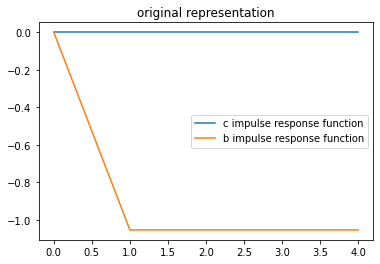

In [11]:
plt.title("original representation")
plt.plot(range(J), c_res1 / σϵ, label="c impulse response function")
plt.plot(range(J), b_res1 / σϵ, label="b impulse response function")
plt.legend()

The above two impulse response functions show that when the consumer has
the information assumed in the original representation, his response to
receiving a positive shock of $\epsilon_t$ is to leave his
consumption unchanged and to save the entire amount of his extra income
and then forever roll over the extra bonds that he holds.

To see this notice, that starting from next period on, his debt
permanently **decreases** by $\beta^{-1}$

In [12]:
c_res2 / σa, b_res2 / σa

(array([0.0975, 0.0975, 0.0975, 0.0975, 0.0975]),
 array([ 0.  , -0.95, -0.95, -0.95, -0.95]))

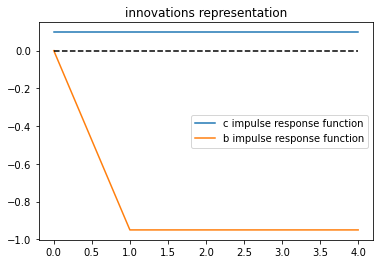

In [13]:
plt.title("innovations representation")
plt.plot(range(J), c_res2 / σa, label="c impulse response function")
plt.plot(range(J), b_res2 / σa, label="b impulse response function")
plt.plot([0, J-1], [0, 0], '--', color='k')
plt.legend()

The above impulse responses show that when the consumer has only the
information that is assumed to be available under the innovations
representation for $\{y_t - y_{t-1} \}$, he responds to a positive
$a_t$ by permanently increasing his consumption.

He accomplishes this by consuming a fraction $(1 - \beta^2)$ of
the increment $a_t$ to his nonfinancial income and saving the rest
in order to lower $b_{t+1}$ to finance the permanent increment in
his consumption.

The preceding computations confirm what we had derived earlier using
paper and pencil.

Now let’s simulate some paths of consumption and debt for our two types
of consumers while always presenting both types with the same
$\{y_t\}$ path, constructed as described below.

In [14]:
# Set time length for simulation
T = 100

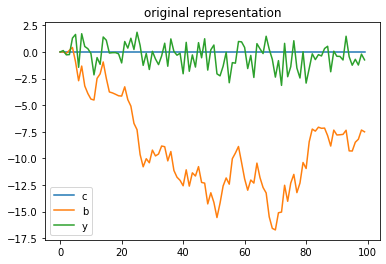

In [15]:
x1, y1 = LSS1.simulate(ts_length=T)
plt.plot(range(T), y1[0, :], label="c")
plt.plot(range(T), x1[2, :], label="b")
plt.plot(range(T), x1[0, :], label="y")
plt.title("original representation")
plt.legend()

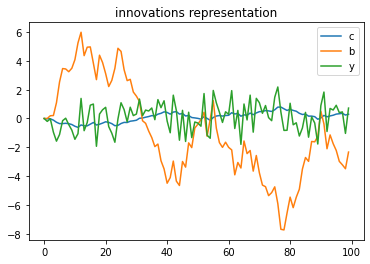

In [16]:
x2, y2 = LSS2.simulate(ts_length=T)
plt.plot(range(T), y2[0, :], label="c")
plt.plot(range(T), x2[2, :], label="b")
plt.plot(range(T), x2[0, :], label="y")
plt.title("innovations representation")
plt.legend()

### Simulating the Income Process and Two Associated Shock Processes

We now describe how we form a **single** $\{y_t\}_{t=0}^T$ realization
that we will use to simulate the two different decision rules associated
with our two types of consumer.

We accomplish this in the following steps.

1. We form a $\{y_t, \epsilon_t\}$ realization by drawing a long
   simulation of $\{\epsilon_t\}_{t=0}^T$ where $T$ is a big
   integer $\epsilon_t = \sigma_\epsilon v_t$, $v_t$ is a
   standard normal scalar, $y_0 =100$, and

$$
y_{t+1} - y_t =-\beta^{-1} \epsilon_t + \epsilon_{t+1} .
$$

1. We take the **same** $\{y_t\}$ realization generated in step 1
   and form an innovation process $\{a_t\}$ from the formulas

$$
\begin{aligned} a_0 & = 0 \cr
a_t & = \sum_{j=0}^{t-1} \beta^j (y_{t-j} - y_{t-j-1}) + \beta^t a_0, \quad t \geq 1 \end{aligned}
$$

1. We throw away the first $S$ observations and form the sample
   $\{y_t, \epsilon_t, a_t\}_{S+1}^T$ as the realization that
   we’ll use in the following steps.
1. We use the step 3 realization to **evaluate** and **simulate** the
   decision rules for $c_t, b_t$ that Python has computed for us
   above.

The above steps implement the experiment of comparing decisions made by
two consumers having **identical** incomes at each date but at each date
having **different** information about their future incomes.

### Calculating Innovations in Another Way

Here we use formula {eq}`eqn_3` above to compute $a_{t+1}$ as a function
of the history
$\epsilon_{t+1}, \epsilon_t, \epsilon_{t-1}, \ldots$

Thus, we compute

$$
\begin{aligned}
a_{t+1} &=\beta a_{t}+\epsilon_{t+1}-\beta^{-1}\epsilon_{t} \\
    &=\beta\left(\beta a_{t-1}+\epsilon_{t}-\beta^{-1}\epsilon_{t-1}\right)+\epsilon_{t+1}-\beta^{-1}\epsilon_{t} \\
    &=\beta^{2}a_{t-1}+\beta\left(\epsilon_{t}-\beta^{-1}\epsilon_{t-1}\right)+\epsilon_{t+1}-\beta^{-1}\epsilon_{t} \\
    &=\cdots \\
    &=\beta^{t+1}a_{0}+\sum_{j=0}^{t}\beta^{j}\left(\epsilon_{t+1-j}-\beta^{-1}\epsilon_{t-j}\right) \\
    &=\beta^{t+1}a_{0}+\epsilon_{t+1}+\left(\beta-\beta^{-1}\right)\sum_{j=0}^{t-1}\beta^{j}\epsilon_{t-j}-\beta^{t-1}\epsilon_{0}.
\end{aligned}
$$

We can verify that we recover the same $\{a_t\}$ sequence
computed earlier.

### Another Invertibility Issue

This [quantecon lecture](https://python-advanced.quantecon.org/hs_invertibility_example.html) contains another example of a shock-invertibility issue that is endemic
to the LQ permanent income or consumption smoothing model.

The technical issue discussed there is ultimately the source of the shock-invertibility issues discussed by
Eric Leeper, Todd Walker, and Susan Yang {cite}`Leeper_Walker_Yang` in their  analysis of **fiscal foresight**.